In [1]:
using BeamLib: IsotropicArray, steer, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music(pa, Rxx, d, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 454.5472276381365
 452.03107856348737
 444.60714224498156
 432.6354682545434
 416.6736976765379
 397.42146055049517
 375.65640768637894
 352.1713685389403
 327.7203495741462
 302.9781503143984
   ⋮
 533.9998208702646
 488.84240032255786
 454.18422377352067
 427.6587849478261
 407.6477858066724
 393.0394433728265
 383.08067118987276
 377.2861320600223
 375.38382995661624

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

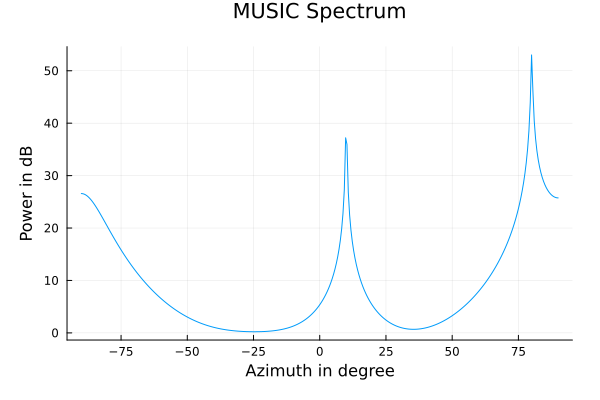

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")